# **Outlier Detection**

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

## Data Understanding

### Performing an Exploratory Data Analysis (EDA) to explain findings from houses dataset

       median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   20640.000000        20640.000000  20640.000000   
mean        206855.816909       3.870671           28.639486   2635.763081   
std         115395.615874       1.899822           12.585558   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.563400           18.000000   1447.750000   
50%         179700.000000       3.534800           29.000000   2127.000000   
75%         264725.000000       4.743250           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1425.476744    499.539680     35.631861   -119.569704  
std        421.247906   1132.462122    382.329753      2.

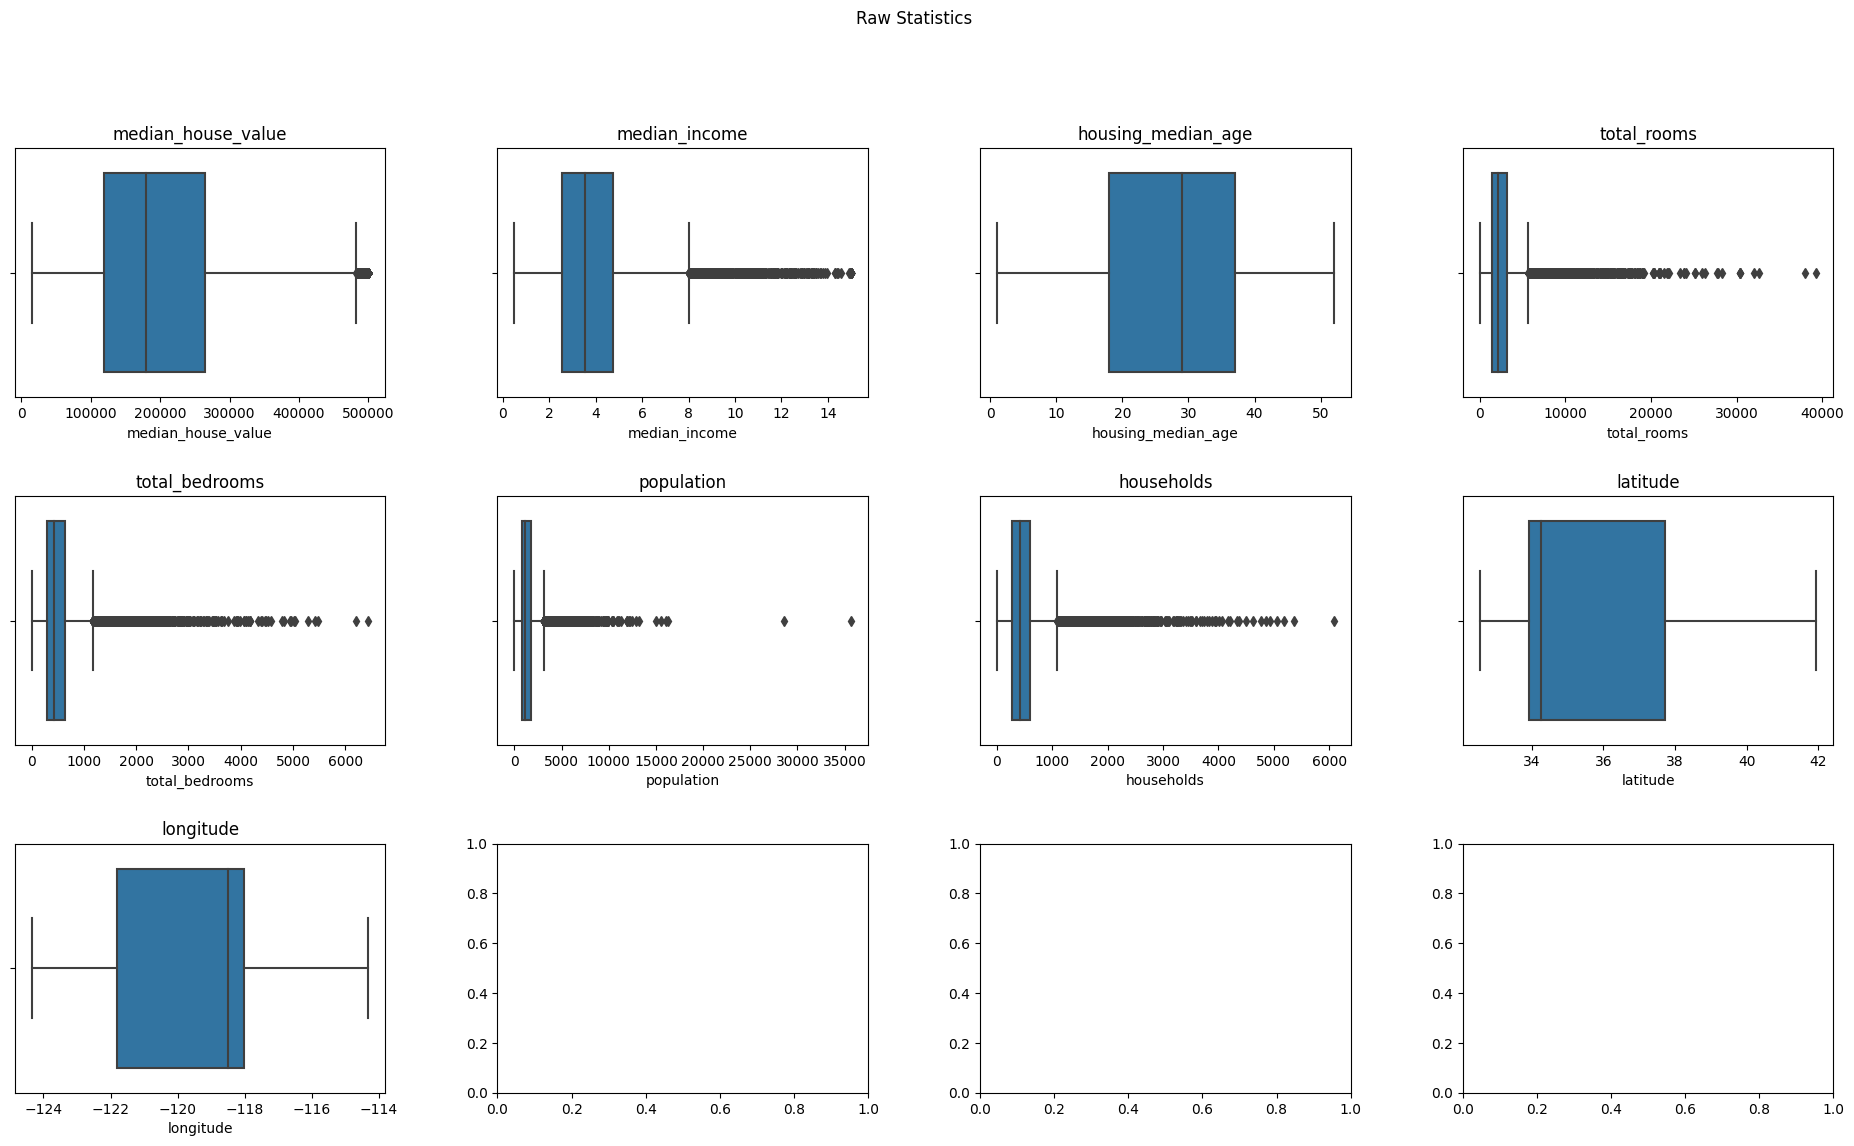

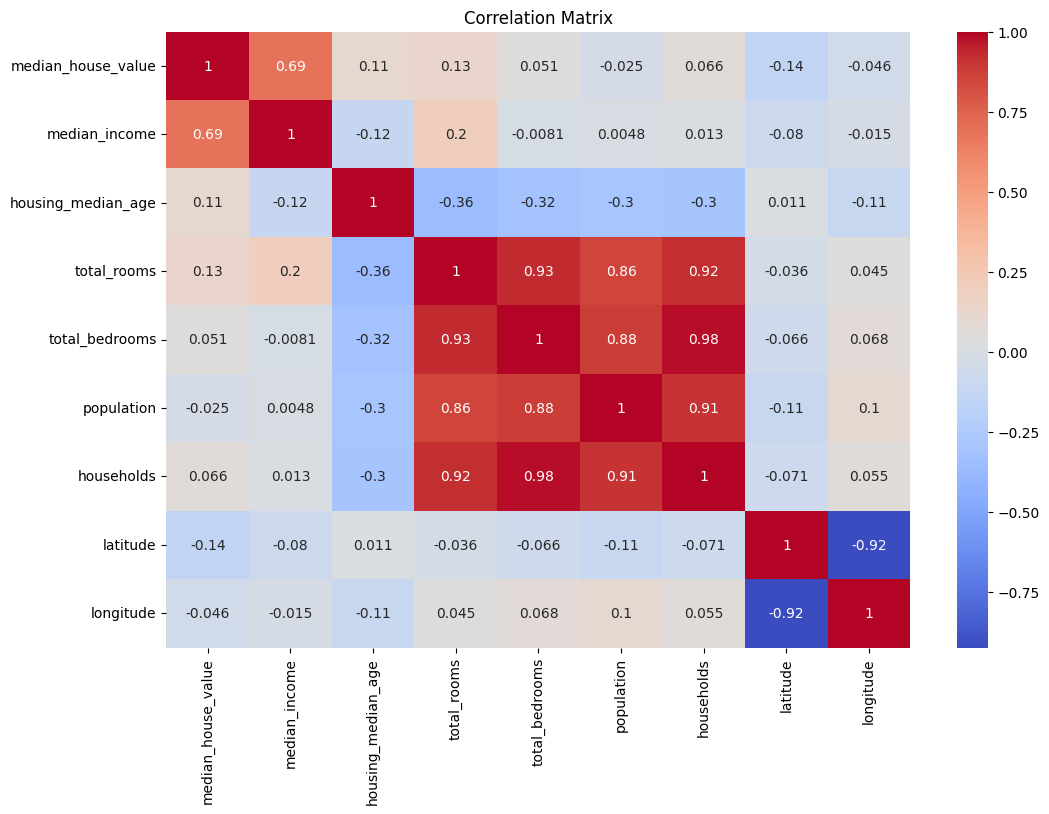

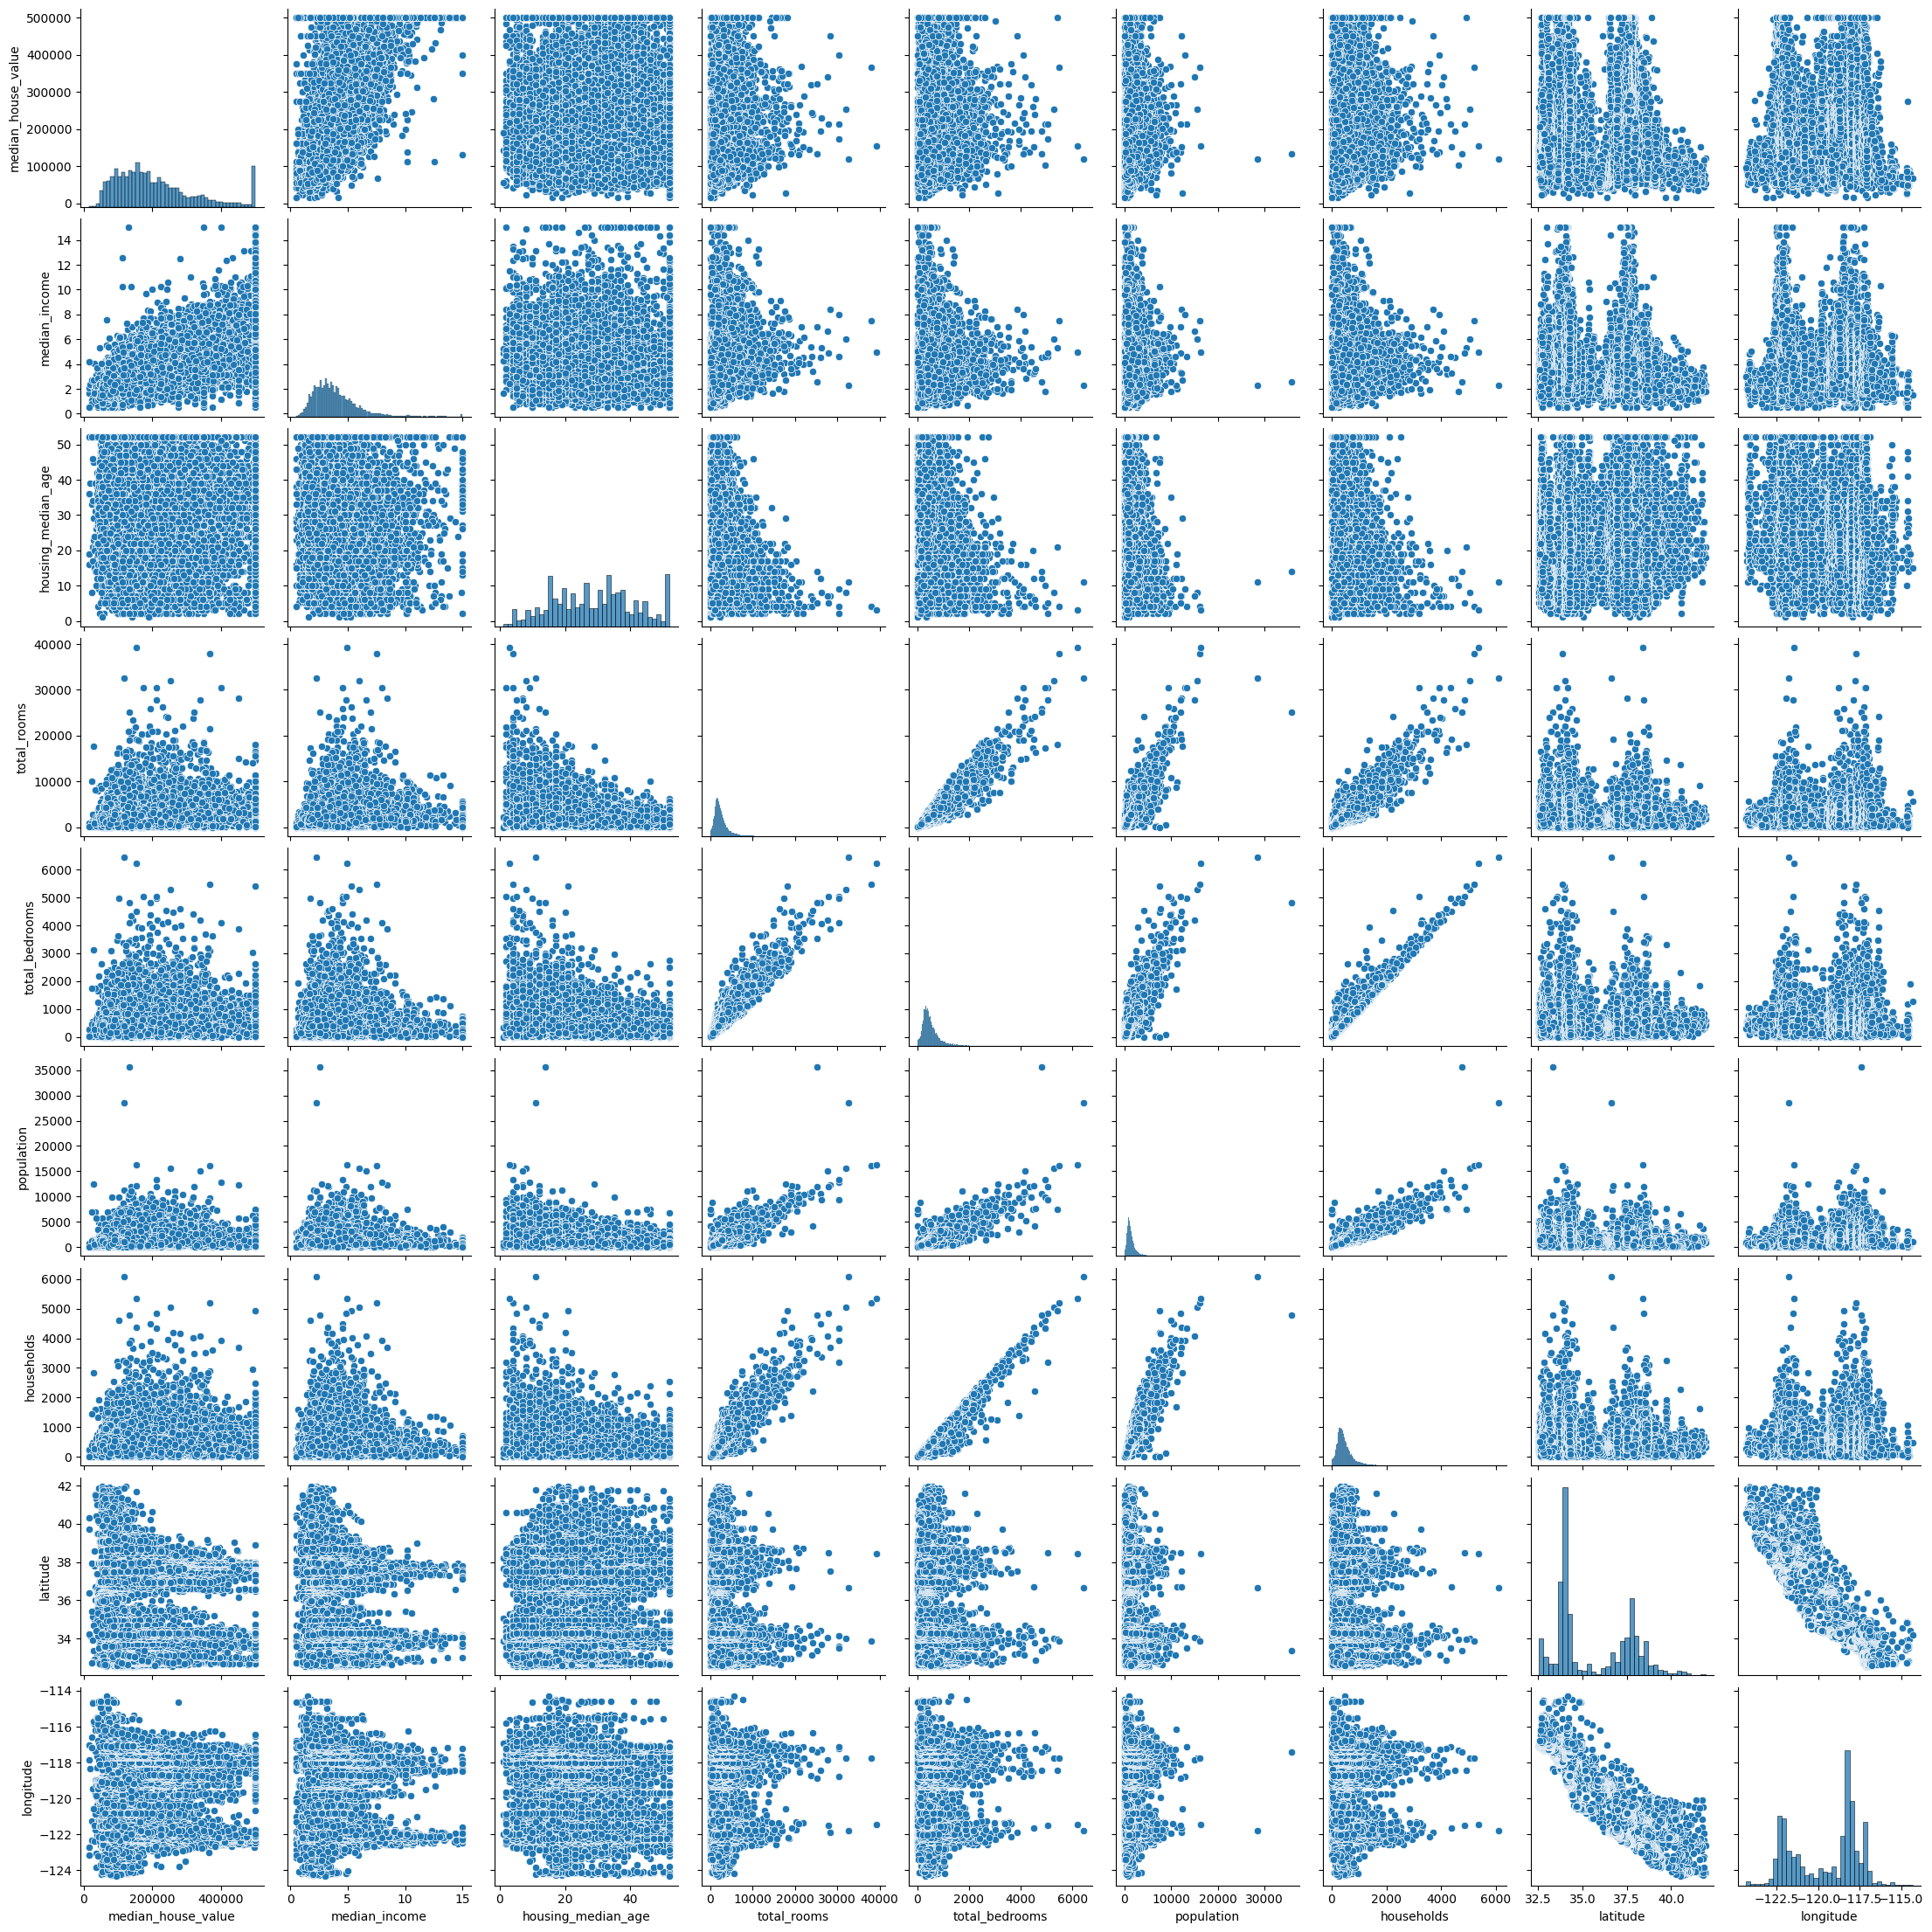

In [ ]:
# Necessary imports
import matplotlib.pyplot as plt
from math import ceil

outliers = []

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    # Get outliers
    for c in columns:
            Q1 = data[c].quantile(0.25)
            Q3 = data[c].quantile(0.75)
            IQR = Q3 - Q1
            outliers.extend(data.index[(data[c] < Q1 - 1.5*IQR) | (data[c] > Q3 + 1.5*IQR)])


    print("plotting columns {c}".format(c=list(columns)))

    if type not in {'boxplot', 'kdeplot'}:
        print("type= {boxplot, kdeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4

    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)

    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1

    else:
    # general case of a 2D grid
        i=j=0
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0

# Summary statistics
summary_stats = houses.describe()
print(summary_stats)

# Plot the boxplot
plot_distributions(houses, houses.columns, type='boxplot', title='Raw Statistics')

# Plot the correlation matrix separately
plt.figure(figsize=(12, 8))
corr_matrix = houses.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot the pairplot
sns.pairplot(houses)
plt.show()

#### This dataset demonstrates various satistics of housing realities, offering key insights for various regions. The summary of the dataset I provided shows the variance in the different metrics, and allows understanding of averages. There are clearly outliers that skew these averages, it is important these are identified.
#### The boxplots provide insights into various housing-related features. The distribution of median house values exhibits moderate variability, with some outliers indicating potential areas of high real estate value. Median income shows a positively skewed distribution, suggesting that the majority of the population falls within a certain income range, but there are notable outliers representing higher-income areas. As can be seen in this visualisation, there are many plots that are outside the whisker bounds of the plot. These anomolies will be extracted
#### The correlation matrix shows the relationship between all the columns of the dataset and how closely interlinked some of them are. Many of the correlations are intuitive such as total bedrooms and total rooms, yet it is interesting to see the less obvious connections such as the negative correlation between latitude and population. This could be due to the outliers that exist in this dataset. Finally, the pairplot, despite being intensive to generate, is a very effective way to see the outliers

## Feature Extraction

#### During the process of extracting features from the dataset, a thorough exploratory data analysis (EDA) was conducted, involving summary statistics, box plots, pair plots, and a correlation matrix. This comprehensive examination aimed to identify variables that play a pivotal role in detecting potential outliers. Notably, certain features, including 'median_house_value,' 'median_income,' 'total_rooms,' 'total_bedrooms,' 'population' and 'households,' emerged as crucial indicators of potential anomalies. Outliers in median house value and median income could provide valuable insights into regions characterised by unique economic conditions, offering an opportunity for further investigation into the socio-economic dynamics of those areas. On the contrary, the apparent absence of outliers in 'latitude,' 'longitude,' and 'median_house_age' shown in the box plots suggests these features exhibit a more uniform distribution, implying a relatively stable pattern within the dataset. Recognising the significance of these features in outlier detection is important for refining the dataset and ensuring that subsequent analyses and models accurately capture the underlying patterns within the data. This knowledge serves as a foundation for making informed decisions about data preprocessing and model development to enhance the robustness and reliability of future analyses.

## Non-Algorithmic Outlier Detection

#### The method I decided to use for thus non-algorithmic outlier detection was assessing the boxplots that were drawn earlier. In the function I added a section that keeps a dictionary of the outliers by seeing which plots are physically outside of the whiskers of the boxplot. Through doing this, as seen below many outliers were identified for each of the columns.

In [ ]:
print("outliers: {o}".format(o=outliers))

outliers: [89, 140, 459, 489, 493, 494, 509, 510, 511, 512, 514, 517, 923, 955, 1574, 1581, 1582, 1583, 1585, 1586, 1591, 1593, 1617, 1621, 1636, 1637, 1638, 1639, 1644, 1645, 1646, 1647, 1914, 3486, 3533, 3542, 3556, 3557, 3571, 3572, 3801, 3858, 3953, 4009, 4010, 4014, 4018, 4033, 4034, 4038, 4039, 4040, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4056, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4106, 4108, 4109, 4110, 4111, 4114, 4115, 4116, 4218, 4220, 4224, 4229, 4233, 4234, 4236, 4237, 4245, 4246, 4247, 4248, 4249, 4252, 4259, 4319, 4327, 4345, 4346, 4347, 4348, 4350, 4351, 4352, 4353, 4354, 4355, 4360, 4559, 4603, 4604, 4605, 4606, 4607, 4622, 4624, 4626, 4630, 4644, 4674, 4675, 4677, 4678, 4679, 4680, 4681, 4688, 4693, 4694, 4698, 4700, 4702, 4703, 4713, 4715, 4719, 4727, 4740, 4823, 4861, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 52

## Algorithmic Outlier Detection

### Data Normalisation and LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalised
columns_to_normalise = ["median_house_value", "median_income",
            "total_rooms", "total_bedrooms", "population", "households"]

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalise the selected columns
houses_normalised = houses.copy()
houses_normalised[columns_to_normalise] = scaler.fit_transform(houses_normalised[columns_to_normalise])

# Print the normalised dataset
print(houses_normalised)

# Select features for outlier detection
features = ["median_house_value", "median_income",
            "total_rooms", "total_bedrooms", "population", "households"]

# Select the relevant columns
X = houses_normalised[features]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = lof.fit_predict(X)

# Identify outlier indices (where the score is -1)
outlier_indices = X.index[outlier_scores == -1]

# Print the outliers
print(houses_normalised.iloc[outlier_indices])


       median_house_value  median_income  housing_median_age  total_rooms  \
0                0.902266       0.539668                41.0     0.022331   
1                0.708247       0.538027                21.0     0.180503   
2                0.695051       0.466028                52.0     0.037260   
3                0.672783       0.354699                52.0     0.032352   
4                0.674638       0.230776                52.0     0.041330   
...                   ...            ...                 ...          ...   
20635            0.130105       0.073130                25.0     0.042296   
20636            0.128043       0.141853                18.0     0.017676   
20637            0.159383       0.082764                17.0     0.057277   
20638            0.143713       0.094295                18.0     0.047256   
20639            0.153403       0.130253                16.0     0.070782   

       total_bedrooms  population  households  latitude  longitude  
0     

### Comparison

In [ ]:
# List of common outliers across methods
outliers = [i for i in outliers if i in outlier_indices]
print("outliers: {o}".format(o=outliers))

outliers: [89, 140, 459, 1583, 1617, 1645, 1914, 3858, 4010, 4018, 4038, 4047, 4049, 4067, 4106, 4110, 4114, 4259, 4347, 4350, 4351, 4352, 4354, 4355, 4559, 4626, 4630, 4693, 4702, 4823, 4861, 5241, 5242, 5244, 5246, 5247, 5248, 5250, 5253, 5259, 5265, 5270, 5275, 5282, 5301, 5304, 5306, 5313, 5318, 5347, 5355, 5492, 5493, 5538, 5724, 6073, 6205, 6388, 6399, 6556, 6576, 6579, 6639, 6651, 6688, 6691, 6911, 8632, 8634, 8642, 8758, 8767, 8774, 8786, 8792, 8794, 8800, 8802, 8804, 8805, 8807, 8809, 8818, 8846, 8848, 8849, 8851, 8853, 8854, 8858, 8874, 8878, 8887, 8924, 8928, 8947, 8985, 8990, 9005, 9010, 9013, 9014, 9015, 9022, 9025, 9027, 9031, 9033, 9327, 9355, 9370, 9381, 9385, 9417, 9418, 9423, 9801, 9811, 9850, 10336, 10405, 10448, 10519, 10574, 10666, 10673, 10728, 10799, 10999, 11490, 12069, 12138, 12213, 12220, 12389, 13177, 13361, 13766, 14460, 14545, 14817, 15311, 15500, 15615, 15617, 15620, 15652, 15656, 15660, 15661, 15663, 15667, 15688, 15689, 15698, 15707, 16018, 16127, 16170,

#### Both my non-algorithmic (boxplot analysis) and algorithmic (Local Outlier Factor - LOF) approach to outlier detection share the common goal of identifying outliers but differ in their approach. As seen above in my code, they share many values. The non-algorithmic boxplot allows visual data analysis, relying on simple thresholding based on the interquartile range. This was effective here as it is a simple implementaation, but because of the reliance on a well designed boxplot, it may not be the strongest method. In contrast, the LOF considered local density variations. It offers adaptability for more intricate structures, and for larger and high-dimensional data. Ultimately, the effectiveness of each method hinges on the specific nature and goals of the analysis, and a combined approach like this one offered a comprehensive outlier detection strategy.

# **Imputation**

## Data Understanding

In [ ]:
houses_mar = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv', header=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20640 non-null  int64  
 1   median_house_value  20640 non-null  float64
 2   median_income       10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          10320 non-null  float64
 7   households          20640 non-null  float64
 8   latitude            20640 non-null  float64
 9   longitude           20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB
None
         Unnamed: 0  median_house_value  median_income  housing_median_age  \
count  20640.000000        20640.000000   10320.000000        10320.000000   
mean   10319.500000       206855.816909       3.940372           27.649128   
std     5958.3

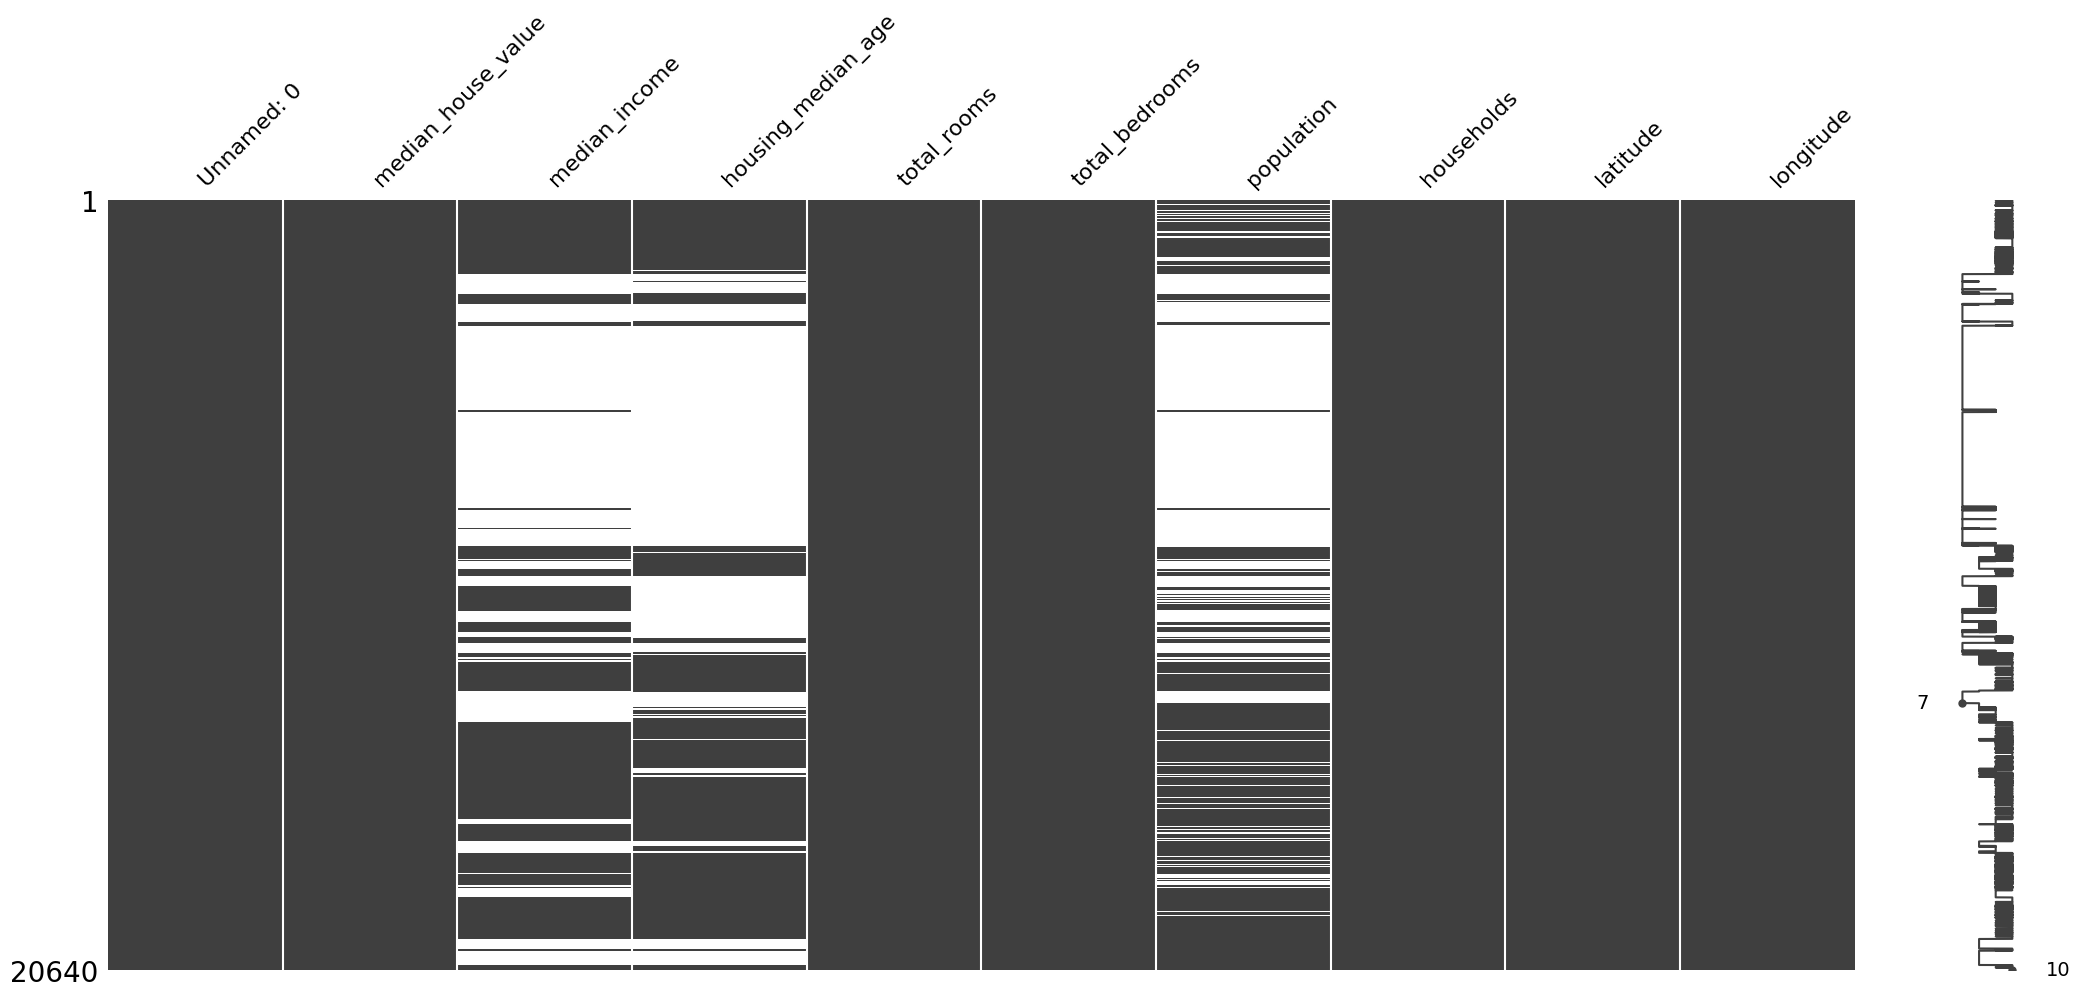

In [ ]:
import missingno as msno

# Display basic information about the dataset
print(houses_mar.info())

# Display summary statistics of numerical columns
print(houses_mar.describe())

# Display the first few rows of the dataset
print(houses_mar.head())

# Check for missing values
print("Missing values:", houses_mar.isnull().sum())

# Plot a matrix for missing data
msno.matrix(houses_mar)
plt.show()

#### As can be seen in the result of my code above, this dataset is identical to the houses dataset in structure, but contains many instances of missing data. These can be found in median_income, housing_median_age and population which each have 10320 missing values. Using different imputation techniques as I am about to will allow for appropriate replacement of these values. The unnamed column that is displayed above is of course the index of each field.The matrix above demonstrates the patterns of the missing data and shows that often if one piece of data is missing, other records are likely to be missing too.

## KNN Imputation and M1 model

Unnamed: 0            0
median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64


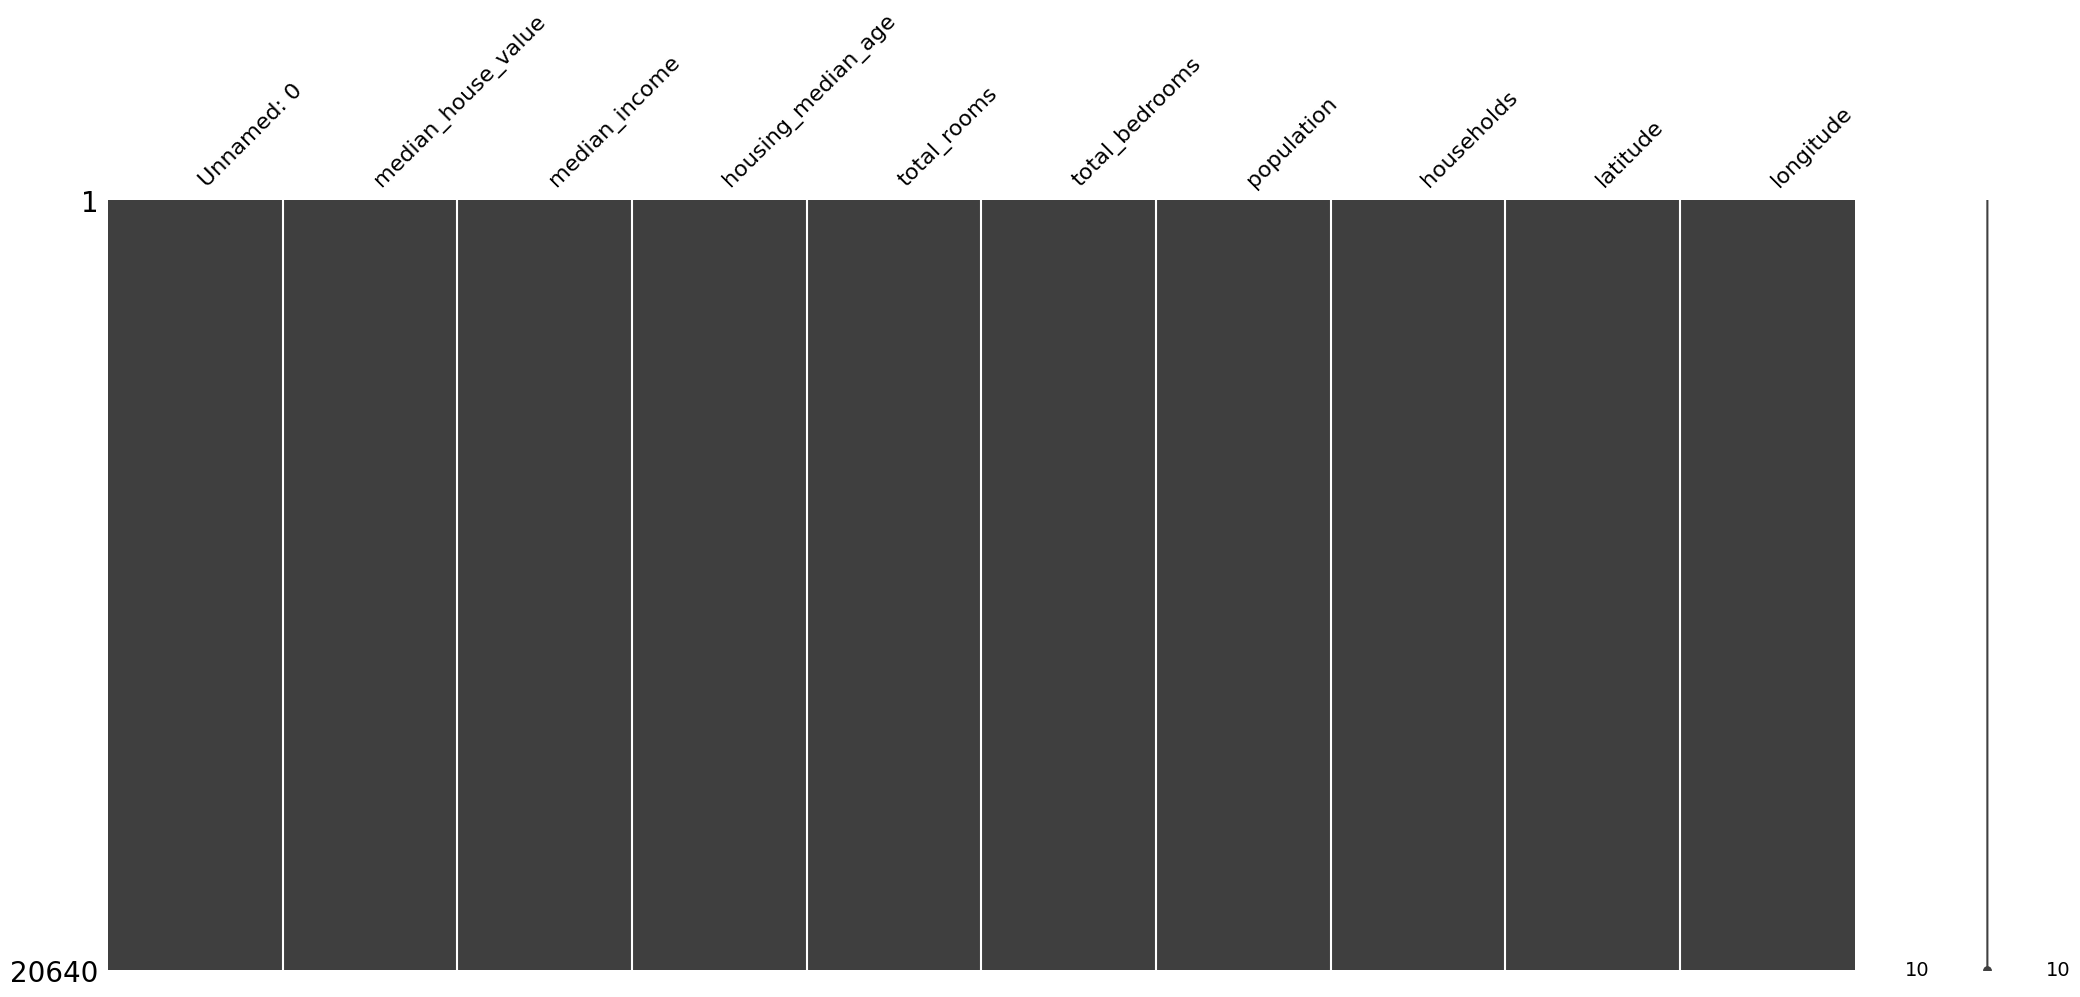

Mean Squared Error (Model M1): 7765680503.361732


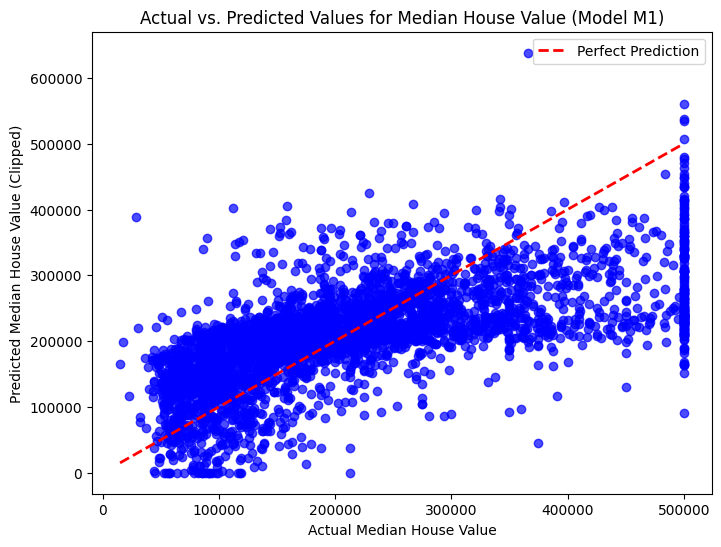

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting the features for imputation
features_for_imputation = ['median_income', 'housing_median_age', 'population']

# Creates a copy of the dataset to store imputed values
imputed_houses = houses_mar.copy()

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
imputed_houses[features_for_imputation] = imputer.fit_transform(houses_mar[features_for_imputation])

# Ensure all missing values have been imputed
print(imputed_houses.isnull().sum())

# Plot a matrix for missing data
msno.matrix(imputed_houses)
plt.show()

# 'median_house_value' is the target variable
X = imputed_houses.drop('median_house_value', axis=1)
y = imputed_houses['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regresion model
model_M1 = LinearRegression()
model_M1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_M1 = model_M1.predict(X_test)

# Make it so that houses can't be below 0 in price
min_threshold = 0

# Apply the threshold to predicted values
y_pred_M1_clipped = np.maximum(y_pred_M1, min_threshold)

# Evaluate the model performance with clipped predictions
mse_M1_clipped = mean_squared_error(y_test, y_pred_M1_clipped)
print(f'Mean Squared Error (Model M1): {mse_M1_clipped}')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_M1_clipped, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for Median House Value (Model M1)')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value (Clipped)')
plt.legend()
plt.show()

#### The analysis employs a Linear Regression model, after KNN imputation, denoted as Model M1, to predict house prices based on selected features such as 'median_income,' 'housing_median_age,' and 'population.' The model's performance is evaluated using the Mean Squared Error (MSE) metric on a test set derived from the imputed dataset, and got a score of 7765680503.361732. KNN utilises a concept called the nearest neighbour, as explained by Zhang (2012). This method handled missing values in the chosen features. I have shown in the matrix that there no longer are any missing values. However, the presence of negative predicted values in the scatter plot prompted the implementation of a minimum threshold for predictions to ensure realistic non-negative house prices. This model has a grouping of points at the rightmost side, which seems unusual and could be caused by the imputation method. The performance of Model M1 is clearly influenced greatly by quality of imputation, and this will be further explored when using MICE.

## MICE Imputation and M2 model

Unnamed: 0            0
median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64


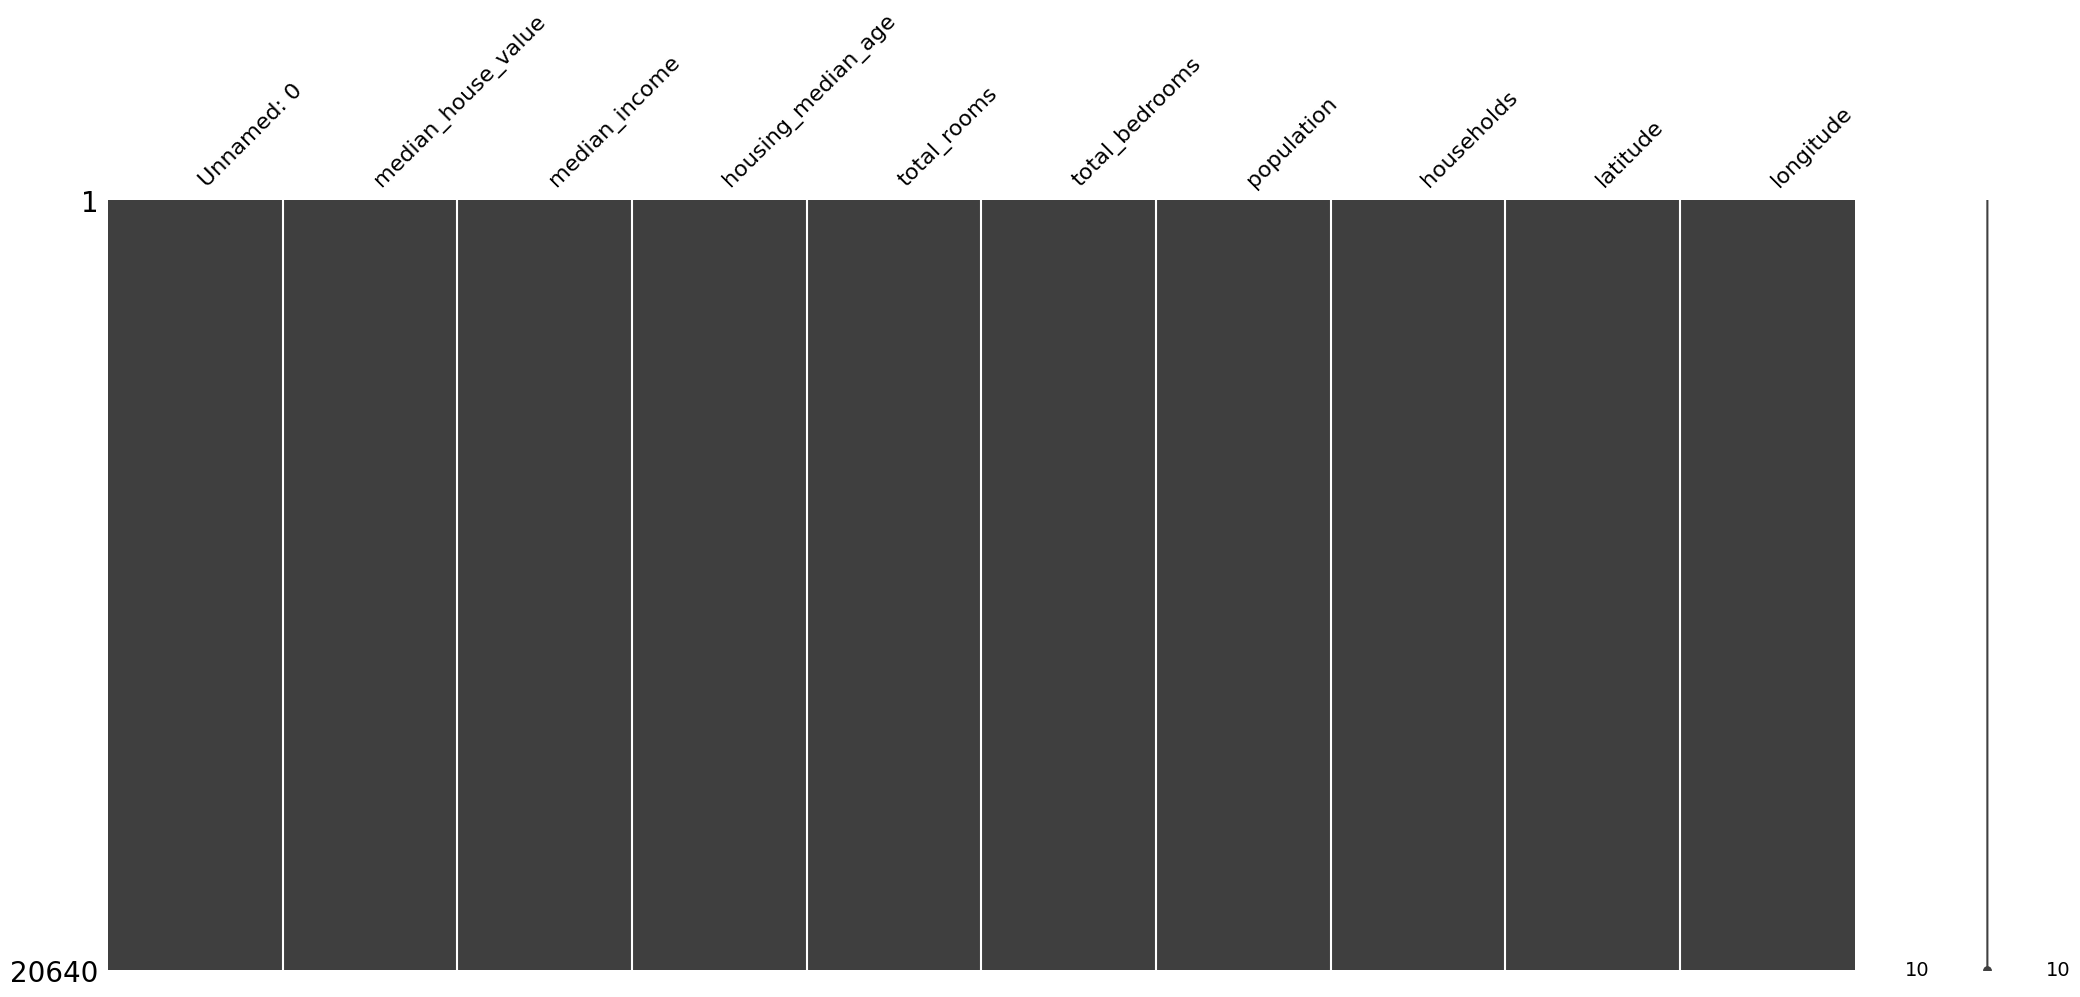

Mean Squared Error (Model M2): 7515940279.564605


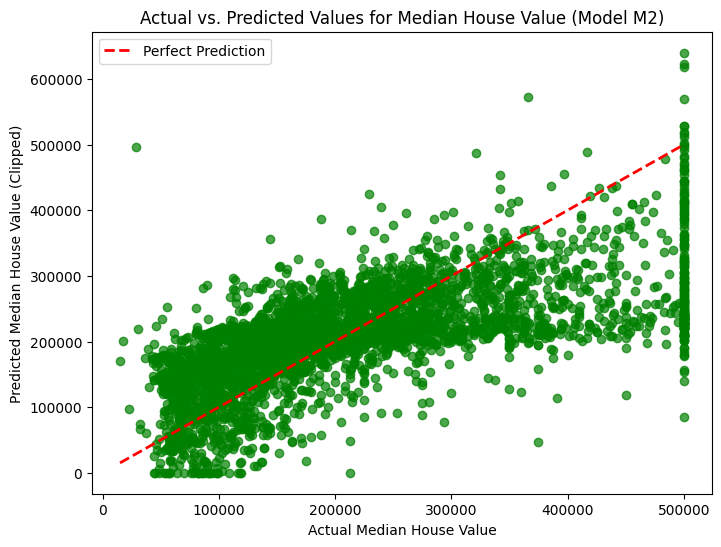

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Creates a copy of the dataset to store imputed values
imputed_houses_mice = houses_mar.copy()

# Impute missing values using MICE
imputer_mice = IterativeImputer(random_state=42)
imputed_houses_mice[features_for_imputation] = imputer_mice.fit_transform(houses_mar[features_for_imputation])

# Ensure all missing values have been imputed
print(imputed_houses_mice.isnull().sum())

# Plot a matrix for missing data
msno.matrix(imputed_houses_mice)
plt.show()

# 'median_house_value' is the target variable
X_mice = imputed_houses_mice.drop('median_house_value', axis=1)
y_mice = imputed_houses_mice['median_house_value']

# Split the dataset into training and testing sets
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X_mice, y_mice, test_size=0.2, random_state=42)

# Train a linear regression model
model_M2 = LinearRegression()
model_M2.fit(X_train_mice, y_train_mice)

# Make predictions on the test set
y_pred_M2 = model_M2.predict(X_test_mice)

# Evaluate the model performance
mse_M2 = mean_squared_error(y_test_mice, y_pred_M2)
print(f'Mean Squared Error (Model M2): {mse_M2}')

# Ensure no negative monetary values in model
min_threshold_M2 = 0

# Apply the threshold to predicted values for Model M2
y_pred_M2_clipped = np.maximum(y_pred_M2, min_threshold_M2)

# Scatter plot with clipped predictions for Model M2
plt.figure(figsize=(8, 6))
plt.scatter(y_test_mice, y_pred_M2_clipped, color='green', alpha=0.7)
plt.plot([min(y_test_mice), max(y_test_mice)], [min(y_test_mice), max(y_test_mice)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for Median House Value (Model M2)')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.show()


#### This analysis employs an implementation of Multiple Imputation by Chained Equations (MICE), described as flexible by Van Buuren and Oudshoorn (1999) for imputing missing values in the dataset. Model M2, utilizing MICE imputation, demonstrates a Mean Squared Error (MSE) of 7515940279.56. This MSE seems high, but we are dealing with large values for pricing. The scatter plot I drew shows that thie is a relatively accurate prediction. This highlighting the effectiveness of the MICE imputation method in capturing patterns and relationships within the data, underscoring the utility of MICE as a robust imputation technique for handling missing data in the context of Model M2 and the houses dataset.

## Comparison

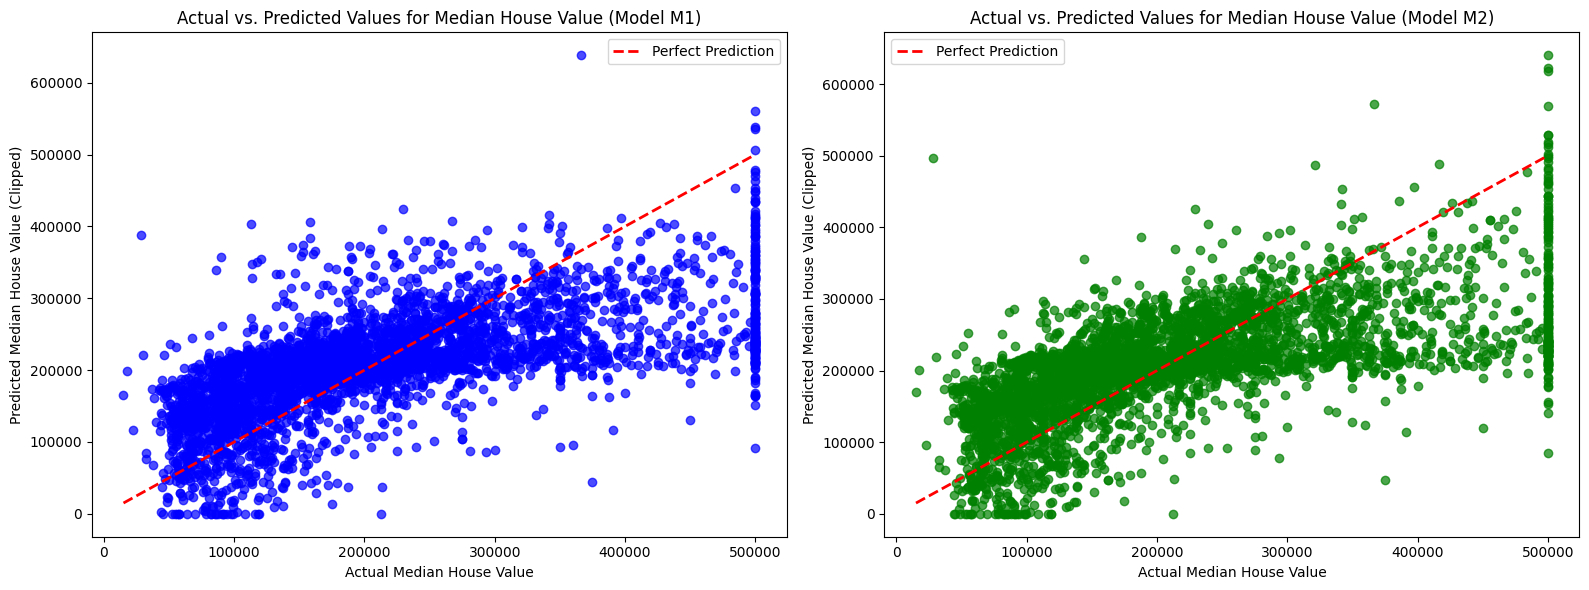

Mean Squared Error (Model M1): 7765680503.361732
Mean Squared Error (Model M2): 7515940279.564605


In [ ]:
# Scatter plot for model M1
plt.figure(figsize=(16, 6))  # Increase the figure width to accommodate both plots side by side

# Subplot 1 for Model M1
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_M1_clipped, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for Median House Value (Model M1)')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value (Clipped)')
plt.legend()

# Scatter plot for Model M2
plt.subplot(1, 2, 2)
plt.scatter(y_test_mice, y_pred_M2_clipped, color='green', alpha=0.7)
plt.plot([min(y_test_mice), max(y_test_mice)], [min(y_test_mice), max(y_test_mice)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for Median House Value (Model M2)')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# M1 MSE
print(f'Mean Squared Error (Model M1): {mse_M1_clipped}')

# M2 MSE
print(f'Mean Squared Error (Model M2): {mse_M2}')



#### Both models displayed used the same linear regression formula.In comparing the performance of Model M1, employing k-nearest neighbors (KNN) imputation, and Model M2, utilising Multiple Imputation by Chained Equations (MICE), the mean squared error (MSE) serves as a crucial metric. Model M2 demonstrates a slightly lower MSE (7515940279.56) compared to Model M1 (7765680503.36), indicating a better ability to minimize the squared differences between predicted and actual values. This can also be seen in the graphs as M2 seems to fir the perfect prediction more, albeit only slightly. Notably, KNN, being a non-parametric algorithm, may be sensitive to outliers, potentially affecting Model M1's performance. On the other hand, MICE, known for its robustness in handling missing data through iterative imputations based on conditional distributions, likely contributes to the superior performance of Model M2. For the houses dataset, my preference leans towards MICE, given its ability to handle complex relationships and outliers effectively, as reflected in the lower MSE and result of graoh analysis for Model M2.

# References

#### Van Buuren, S. and Oudshoorn, K., 1999. Flexible multivariate imputation by MICE (pp. 1-20). Leiden: TNO.
#### Zhang, S., 2012. Nearest neighbor selection for iteratively kNN imputation. Journal of Systems and Software, 85(11), pp.2541-2552.
#### Newcastle University., (2023) 'Predictive Analytics Computer Vision & AI - CSC3831'. Newcastle University: School of Computing.